# Sentiment Analysis of Airline Tweets

## Introduction
In this analysis, we aim to evaluate the sentiment of tweets directed towards different airlines. The sentiment can be categorized into positive, negative, or neutral based on the content of each tweet. This exercise is crucial for airlines to understand customer feedback and sentiment towards their services.

## Methodology
1. **Data Collection**:  
   - Gather tweets mentioning various airlines (e.g., American Airlines, Delta, United) using Twitter API 

2. **Preprocessing**:  
   - Clean the tweets to remove noise such as special characters, URLs, and hashtags.
   - Tokenize the tweets into words and remove stopwords.

3. **Sentiment Analysis**:  
   - Use a sentiment analysis tool or library (e.g., NLTK, TextBlob, VADER) to assign sentiment scores to each tweet.
   - Classify tweets into positive, negative, or neutral categories based on sentiment scores or thresholds.

## Analysis
- **Positive Sentiment**: Tweets expressing satisfaction, appreciation, or positive experiences with the airline's services.
  
- **Negative Sentiment**: Tweets expressing dissatisfaction, complaints, or negative experiences with the airline's services.
  
- **Neutral Sentiment**: Tweets that do not express a strong opinion or sentiment about the airline, often factual or informational in nature.

## Results
- Aggregate the number and percentage of tweets falling into each sentiment category for each airline.
- Provide visualizations such as bar charts or pie charts to illustrate the distribution of sentiment across different airlines.

## Conclusion
Understanding the sentiment of tweets towards airlines is crucial for improving customer experience and addressing issues promptly. By analyzing these sentiments, airlines can identify areas of improvement and leverage positive feedback to enhance their services further.

This analysis not only provides insights into customer perceptions but also serves as a tool for airlines to gauge public opinion and adapt their strategies accordingly.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import emoji
from transformers import BertTokenizerFast
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from transformers import TFBertModel
import tensorflow as tf
from tensorflow import keras

In [54]:
tweets = pd.read_csv("data\Tweets.csv")

In [55]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [56]:
tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [57]:
tweets.shape

(14640, 15)

In [58]:
tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791092e+14,0.162830,0.330440,0.745778
min,5.675880e+17,0.335000,0.000000,0.000000
25%,5.685590e+17,0.692300,0.360600,0.000000
50%,5.694780e+17,1.000000,0.670600,0.000000
75%,5.698902e+17,1.000000,1.000000,0.000000
max,5.703110e+17,1.000000,1.000000,44.000000


In [59]:
sentiment_counts = tweets['airline_sentiment'].value_counts()
sentiment_counts

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [60]:
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

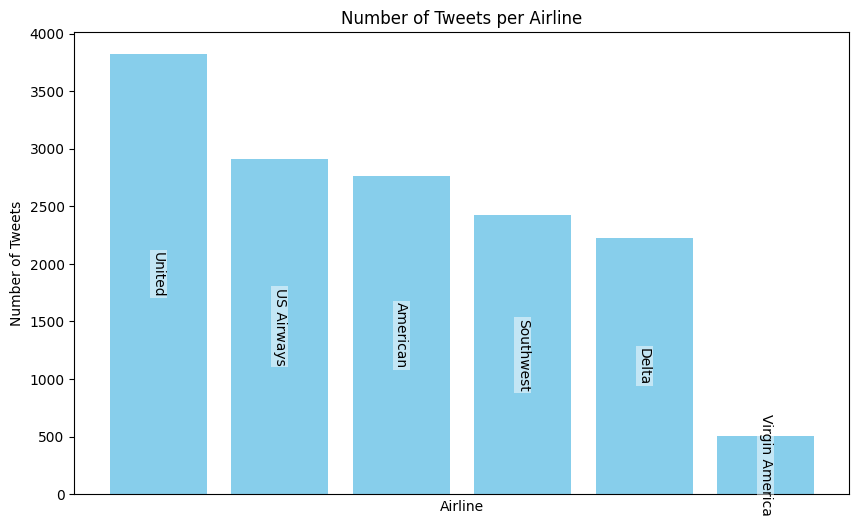

In [61]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the 'tweets' DataFrame is already loaded
# Calculate the value counts for the 'airline' column
airline_counts = tweets['airline'].value_counts()

# Plotting with matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(airline_counts.index, airline_counts.values, color='skyblue')

# Adding titles and labels
plt.title('Number of Tweets per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')

# Remove X-axis labels
plt.xticks([])

# Add the airline names inside the bars, rotated at -90 degrees
for bar, count, airline in zip(bars, airline_counts.values, airline_counts.index):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X coordinate
        bar.get_height() / 2,               # Y coordinate
        airline,                            # Text to display
        ha='center',                        # Horizontal alignment
        va='center',                        # Vertical alignment
        rotation=-90,                       # Rotate text to -90 degrees
        color='black',                      # Text color
        fontsize=10,                        # Text size
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1)  # Background box for contrast
    )

# Show the plot
plt.show()


In [62]:
tweets['negativereason'] = tweets['negativereason'].replace({
    'Flight Booking Problems': 'Booking Problems',
    'Flight Attendant Complaints': 'Attendant Complaints',
    'Customer Service Issue': 'Customer Service'
})

In [63]:
# Analysis of Negative Reasons
print("Common Negative Reasons:")
print(tweets['negativereason'].value_counts())

Common Negative Reasons:
negativereason
Customer Service        2910
Late Flight             1665
Can't Tell              1190
Cancelled Flight         847
Lost Luggage             724
Bad Flight               580
Booking Problems         529
Attendant Complaints     481
longlines                178
Damaged Luggage           74
Name: count, dtype: int64


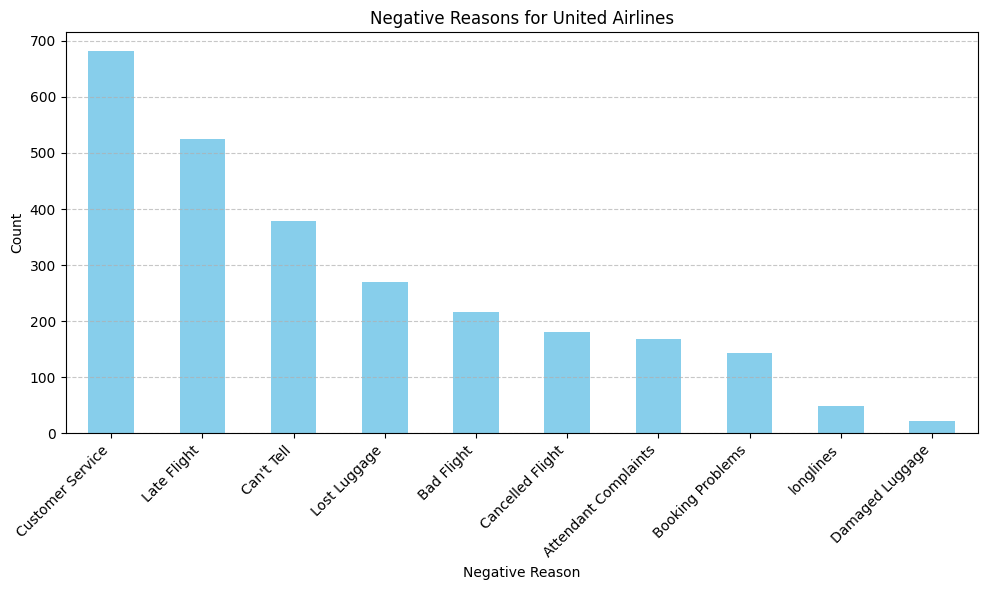

In [64]:
# Filter for United Airlines
united_tweets = tweets[tweets['airline'] == 'United']

# Count the negative reasons
negative_reason_counts = united_tweets['negativereason'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
negative_reason_counts.plot(kind='bar', color='skyblue')
plt.title('Negative Reasons for United Airlines')
plt.xlabel('Negative Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [65]:
#Airline Specific Analysis
airline_sentiment_counts = tweets.groupby('airline')['airline_sentiment'].value_counts()
print("Sentiment Distribution by Airline:")
print(airline_sentiment_counts)
print()

Sentiment Distribution by Airline:
airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: count, dtype: int64



In [66]:
#Tweet Characteristics
tweets['tweet_length'] = tweets['text'].apply(len)
print("Tweet Length Statistics:")
print(tweets['tweet_length'].describe())

Tweet Length Statistics:
count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: tweet_length, dtype: float64


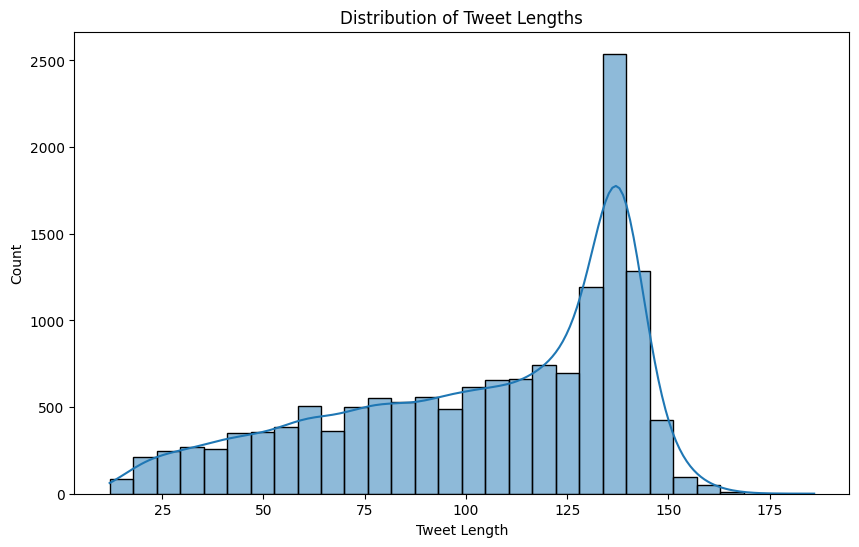

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(tweets['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()

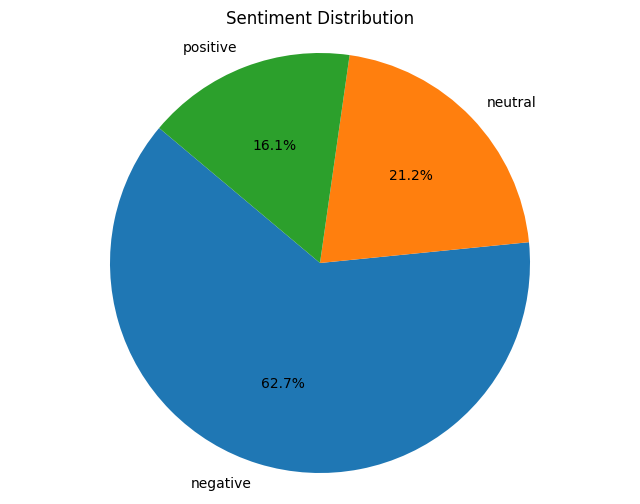

In [68]:
import matplotlib.pyplot as plt

sentiment_counts = tweets['airline_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_15636\1736537017.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='airline', y='positive_proportion', palette='viridis')


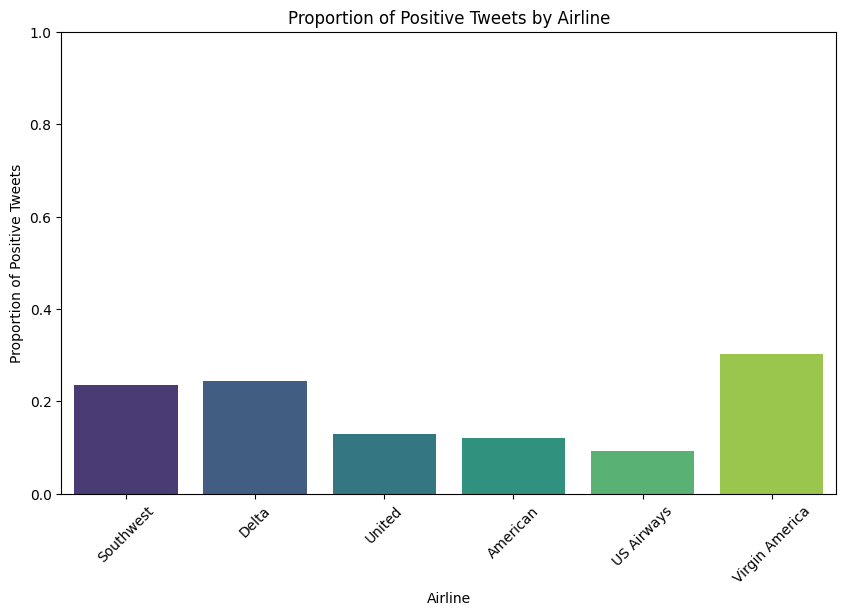

In [69]:
# Filter for positive tweets
positive_tweets = tweets[tweets['airline_sentiment'] == 'positive']

# Count the number of positive tweets by airline
positive_counts = positive_tweets['airline'].value_counts().reset_index()
positive_counts.columns = ['airline', 'positive_count']

# Count the total number of tweets by airline
total_counts = tweets['airline'].value_counts().reset_index()
total_counts.columns = ['airline', 'total_count']

# Merge the counts
counts = pd.merge(positive_counts, total_counts, on='airline')

# Calculate the proportion of positive tweets
counts['positive_proportion'] = counts['positive_count'] / counts['total_count']

# Plot the proportion of positive tweets by airline
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='airline', y='positive_proportion', palette='viridis')
plt.title('Proportion of Positive Tweets by Airline')
plt.xlabel('Airline')
plt.ylabel('Proportion of Positive Tweets')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Ensure the y-axis ranges from 0 to 1 for proportions
plt.show()

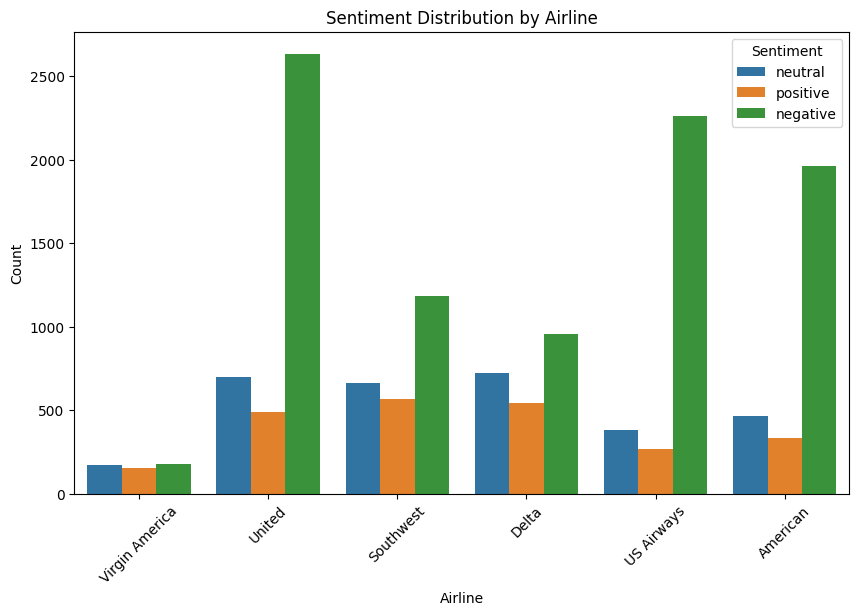

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=tweets)
plt.title('Sentiment Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


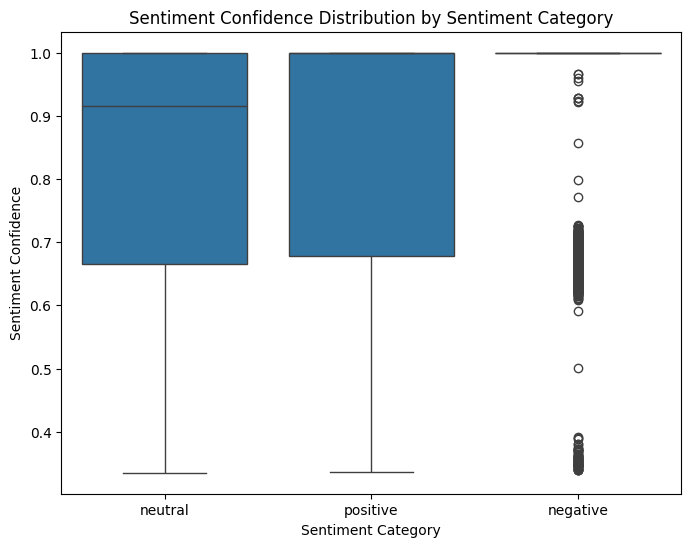

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='airline_sentiment', y='airline_sentiment_confidence', data=tweets)
plt.title('Sentiment Confidence Distribution by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Confidence')
plt.show()


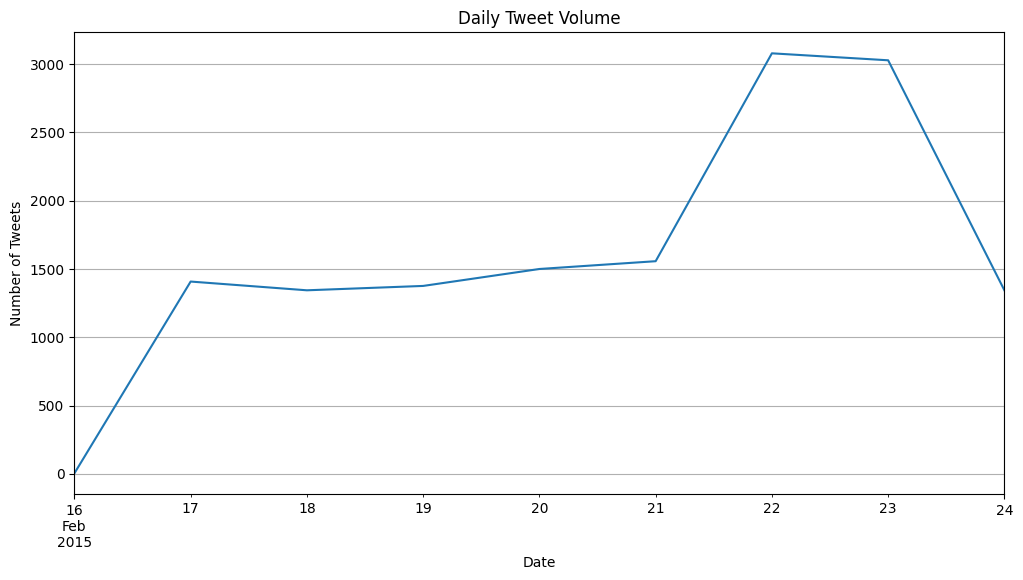

In [72]:
# Convert tweet_created to datetime if it's not already
tweets['tweet_created'] = pd.to_datetime(tweets['tweet_created'])

# Group by date and count tweets
daily_tweet_counts = tweets.resample('D', on='tweet_created').size()

plt.figure(figsize=(12, 6))
daily_tweet_counts.plot()
plt.title('Daily Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


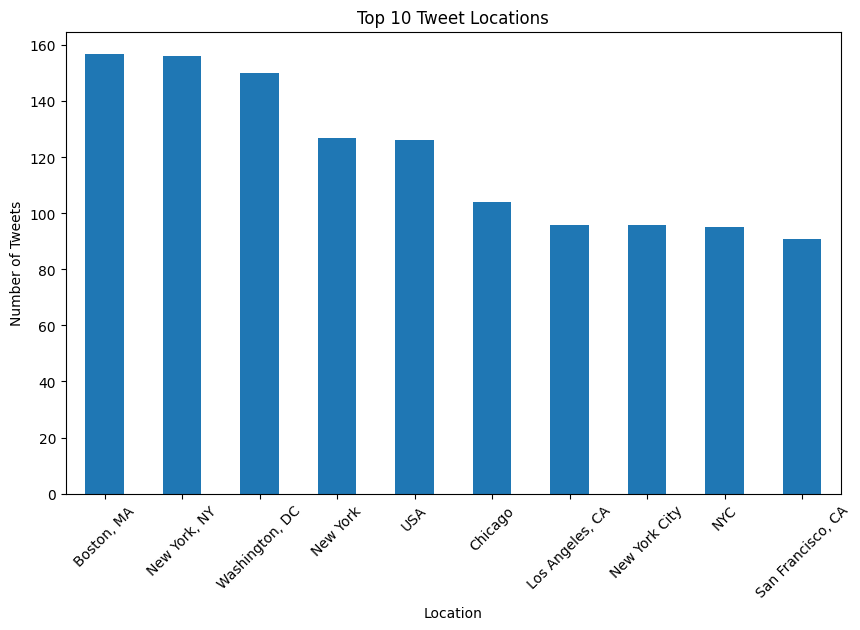

In [73]:
top_10_locations = tweets['tweet_location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar')
plt.title('Top 10 Tweet Locations')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()


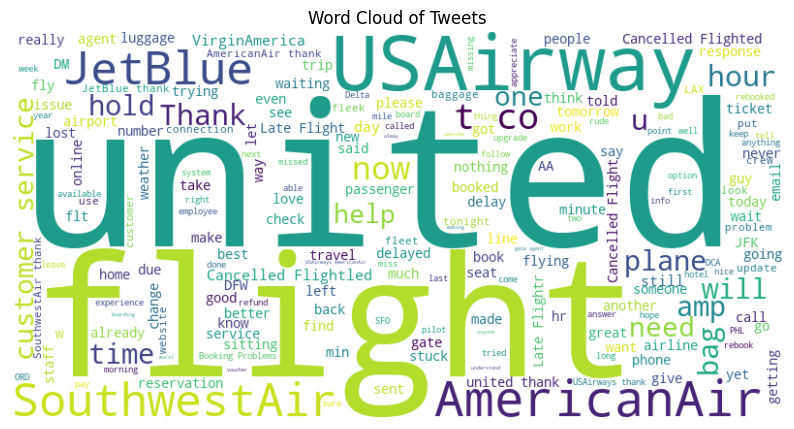

In [74]:
from wordcloud import WordCloud

# Combine all tweets into a single string
all_tweets_text = ' '.join(tweets['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets')
plt.axis('off')
plt.show()


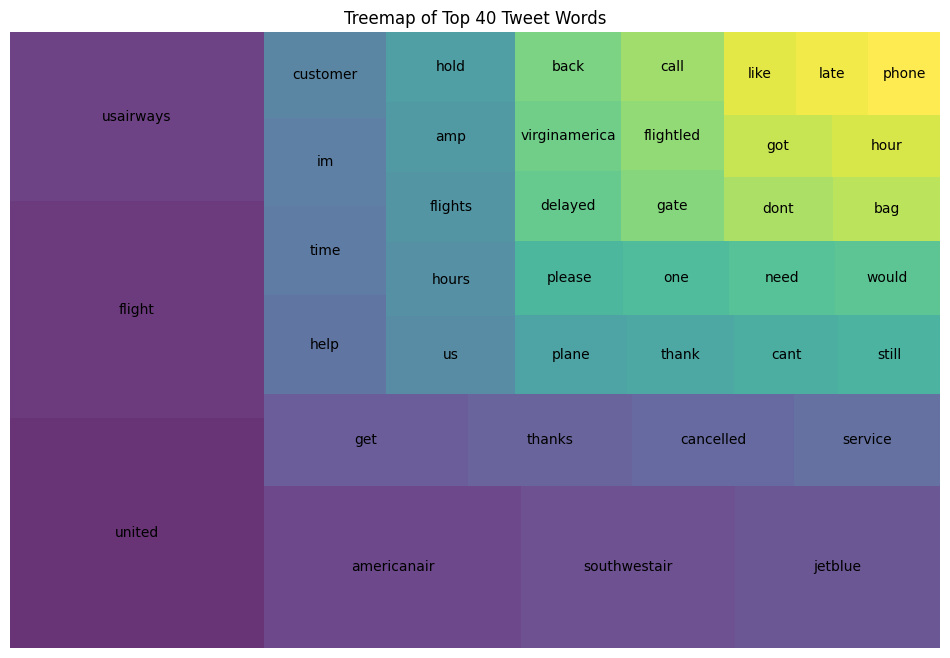

In [76]:
import matplotlib.pyplot as plt
import squarify
from collections import Counter
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np

# Assuming `tweets` is a DataFrame with a column 'text' containing the tweets
# Example tweets DataFrame for illustration
tweets 

# Combine all tweets into a single string
all_tweets_text = ' '.join(tweets['text'])

# Preprocess text: Remove special characters, numbers and convert to lower case
all_tweets_text = re.sub(r'[^A-Za-z\s]', '', all_tweets_text).lower()

# Tokenize the text
words = word_tokenize(all_tweets_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the top 40 words with highest frequency
most_common_words = word_counts.most_common(40)

# Separate the words and their counts
labels = [word for word, count in most_common_words]
sizes = [count for word, count in most_common_words]

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=plt.cm.viridis(np.linspace(0, 1, len(labels))))
plt.axis('off')
plt.title('Treemap of Top 40 Tweet Words')
plt.show()


In [23]:
tweets['text']

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [24]:
df = tweets[['text','airline_sentiment']]

In [25]:
# Custom regex pattern for matching emojis
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002700-\U000027BF"  # Dingbats
    u"\U000024C2-\U0001F251" 
    "]+", flags=re.UNICODE
)

# Remove emojis from text
def strip_emoji(text):
    return emoji_pattern.sub(r"", text)


#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [26]:
texts_new = []
for t in df.text:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

In [27]:
df['text_clean'] = texts_new

C:\Users\USER\AppData\Local\Temp\ipykernel_15636\1660556705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_clean'] = texts_new


In [28]:
df['text_clean'].head()

0                                            what said
1    plus youve added commercials to the experience...
2    i didnt today must mean i need to take another...
3    its really aggressive to blast obnoxious enter...
4              and its a really big bad thing about it
Name: text_clean, dtype: object

In [29]:
df['text_clean'][0:8].values

array(['what said',
       'plus youve added commercials to the experience tacky',
       'i didnt today must mean i need to take another trip',
       'its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
       'and its a really big bad thing about it',
       'seriously would pay 30 a flight for seats that didnt have this playing its really the only bad thing about flying va',
       'yes nearly every time i fly vx this ear worm wont go away',
       'really missed a prime opportunity for men without hats parody there'],
      dtype=object)

In [30]:
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [31]:
df['text_len'] = text_len

C:\Users\USER\AppData\Local\Temp\ipykernel_15636\1478386602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = text_len


C:\Users\USER\AppData\Local\Temp\ipykernel_15636\1676793970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')


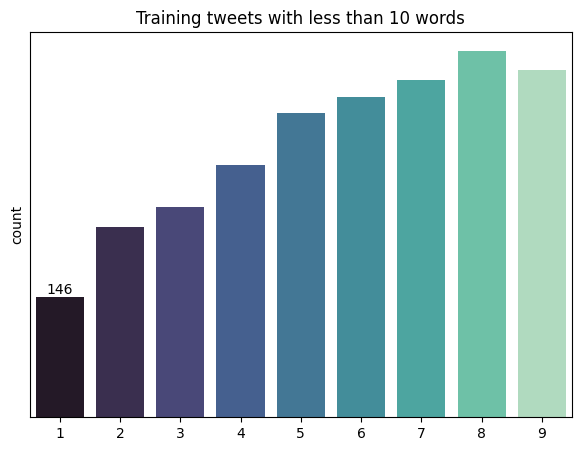

In [32]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [33]:
print(f" Data Shape: {df.shape}")

 Data Shape: (14640, 4)


In [34]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

token_lens = []

for txt in df['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [35]:
print(f"Max Tokenized Sentence length: {max_len}")

Max Tokenized Sentence length: 45


In [36]:
df['token_lens'] = token_lens

C:\Users\USER\AppData\Local\Temp\ipykernel_15636\4033353064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token_lens'] = token_lens


In [37]:
df = df.sort_values(by='token_lens', ascending=False)
df.head(20)

,text,airline_sentiment,text_clean,text_len,token_lens
2020,"@united 2100$ ticket,12h biz trvl,no wifi.Miss...",negative,2100 ticket12h biz trvlno wifimissed con fltne...,13,45
8062,@JetBlue I ❤️ Jetblue but i was on flt 277 fro...,negative,i jetblue but i was on flt 277 from fll to sfo...,34,45
10074,@USAirways My hubby has a 5hr layover in DFW f...,neutral,my hubby has a 5hr layover in dfw fm the cxld ...,30,44
14427,@AmericanAir aftr 10 hrs bng held hstg at mia ...,negative,aftr 10 hrs bng held hstg at mia bc aa refsd t...,29,43
13901,@AmericanAir Need to go frm TPA to MCI tmrw &a...,negative,need to go frm tpa to mci tmrw amp my connecti...,30,43
9677,@USAirways denied me standby bc of checked bag...,negative,denied me standby bc of checked bag in cvg 516...,28,43
8731,@JetBlue big shoutout to the crews on 2017 Bos...,positive,big shoutout to the crews on 2017 bosgtjfk amp...,28,43
5818,@SouthwestAir on brd now.frustrated we go 2 #B...,negative,on brd nowfrustrated we go 2 buf not rocif tld...,26,42
1875,@united. Pls hold UA2066 for 9 cnx pax frm UA...,neutral,pls hold ua2066 for 9 cnx pax frm ua6194 all r...,25,41
10467,@USAirways flt last nght Cancelled Flighted-me...,negative,flt last nght cancelled flightedmechprobs flt ...,25,41


In [38]:
df = df.sample(frac=1).reset_index(drop=True)

In [39]:
df['airline_sentiment'].value_counts() 

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [40]:
df['airline_sentiment'] = df['airline_sentiment'].map({'negative':0,'neutral':1,'positive':2})

In [41]:
rus = RandomUnderSampler()
train_x, train_y = rus.fit_resample(np.array(df['text_clean']).reshape(-1, 1), np.array(df['airline_sentiment']).reshape(-1, 1))

# Creating a DataFrame from the resampled data
train_data = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns=['text_clean', 'airline_sentiment'])

# Splitting the data into training, validation, and test sets (70% train, 15% valid, 15% test)
X = train_data['text_clean'].values
y = train_data['airline_sentiment'].values

# First split: Training and Temp set (85% train + valid, 15% test)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

# Second split: Training and Validation set from the training_temp set (70% train, 15% valid from original)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, stratify=y_train_temp, random_state=42)

# Encoding the labels using OneHotEncoder
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.transform(np.array(y_test).reshape(-1, 1)).toarray()

print(f"TRAINING DATA: {X_train.shape[0]}")
print(f"VALIDATION DATA: {X_valid.shape[0]}")
print(f"TEST DATA: {X_test.shape[0]}")

TRAINING DATA: 4961
VALIDATION DATA: 1064
TEST DATA: 1064


In [42]:
MAX_LEN=128

def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [43]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [44]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [45]:
# Create the learning rate schedule
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=10000,
    decay_rate=0.9
)

# Define optimizer with the learning rate schedule
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Define other parameters
loss = tf.keras.losses.CategoricalCrossentropy()
accuracy = tf.keras.metrics.CategoricalAccuracy()

# Create the model using BERT
def create_model(bert_model, max_len=128):
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32', name='input_ids')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32', name='attention_masks')
    
    # Get the embeddings from BERT model
    embeddings = bert_model([input_ids, attention_masks])[1]
    
    # Add the output layer
    output = tf.keras.layers.Dense(3, activation='softmax')(embeddings)
    
    # Define the model
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)
    
    # Compile the model
    model.compile(optimizer=opt, loss=loss, metrics=[accuracy])
    
    return model


In [46]:
model = create_model(bert_model, MAX_LEN)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_masks (InputLaye  [(None, 128)]                0         []                            
 r)                                                                                               
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_masks[0][0]']     
                             hidden_state=(None, 128, 7                                      